# Espansioni Asintotiche

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
#rcParams['font.size'] = 14

## perturbazioni regolari

Equazioni del tipo

$$\epsilon \frac{du(x)}{dx} - \frac{d^2u(x)}{dx^2} = 0$$

con:
$$u(0) = 1$$
$$u(1) = 0$$

## Soluzione esatta:

$$u(x) = \frac{e^{\epsilon x}-e^{\epsilon}}{1-e^{\epsilon}}$$

In [2]:
ϵ_v = np.logspace(-4,0,num=5)
x = np.linspace(0.0,1.0,num=100)

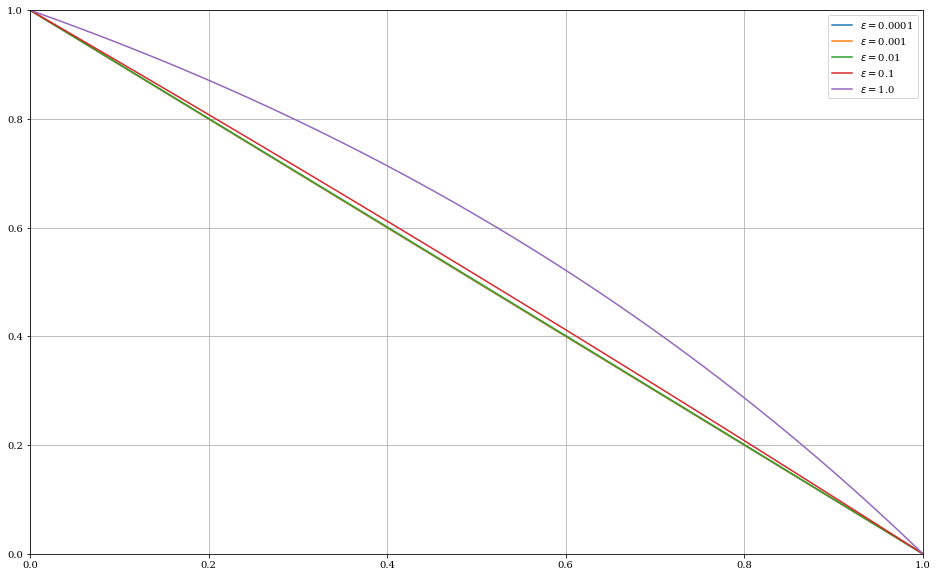

In [3]:
plt.figure(figsize=(16,10))
for ϵ in ϵ_v:
    plt.plot(x,(np.exp(ϵ*x) - np.exp(ϵ))/(1-np.exp(ϵ) ),label=r'$\epsilon=${0}'.format(ϵ))
plt.legend()
plt.xlim([0,1])
plt.ylim([0,1])
plt.grid()

## Espansione

Serie di potenze
$$u(x) = \sum_{i=0}^{\infty} \epsilon^i u_i(x) = u_0(x) + \epsilon u_1(x) + \epsilon^2 u_2(x) + \ldots$$

Sostituendo:
$$\epsilon \frac{d \left( \sum_{i=0}^{\infty} \epsilon^i u_i(x) \right) }{dx} - \frac{d^2 \left( \sum_{i=0}^{\infty} \epsilon^i u_i(x) \right) }{dx^2} = 0 $$

Espandendo:

$$\epsilon u_0'(x) + \epsilon^2u_1' + \epsilon^3 u_2' - u_0''-\epsilon u_1'' - \epsilon^2 u_2'' - \epsilon^3 u_3'' + \ldots = 0$$

Raccogliendo per potenze di $\epsilon$:

$$u_0'' + \epsilon(u_1'' - u_0') + \epsilon^2(u_2'' - u_1') + \ldots = 0 $$

Ovvero:

$$u_0'' + \sum_{i=1}^{\infty} \epsilon^i(u_i''-u_{i-1}') = 0 $$

Deve valere $\forall \epsilon$:
$$u_0'' = 0$$
$$u_i'' - u_{i-1}' = 0$$

$u_0$ utilizza le condizioni al contorno originali, le altre usano condizioni al contorno *omogenee*

## Soluzione

$$u_0''= 0 \quad \implies u_0 = 1-x$$
$$u_1''= u_0' \implies u_1'' = -1$$
Integrando:
$$u_1 = -\frac{x^2}{2} + Ax +B$$
Sostituendo le c.c. $u_1(0) = 0 \ u_1(1) = 0$:
$$u_1 = \frac{1}{2}x(1-x)$$


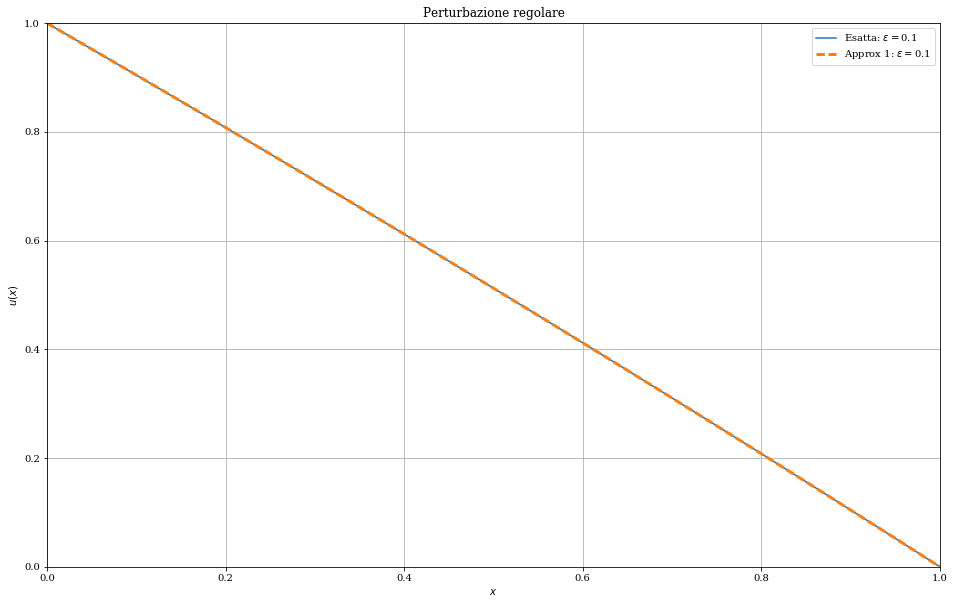

In [4]:
ϵ = ϵ_v[-2]
plt.figure(figsize=(16,10))
plt.plot(x,(np.exp(ϵ*x) - np.exp(ϵ))/(1-np.exp(ϵ) ),label=r'Esatta: $\epsilon=${0}'.format(ϵ))
plt.plot(x,1-x +ϵ*0.5*(x*(1-x)),'--',lw=3,label=r'Approx 1: $\epsilon=${0}'.format(ϵ))
plt.legend()
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel(r'$x$')
plt.ylabel(r'$u(x)$')
plt.title(r'Perturbazione regolare')
plt.grid()

## Perturbazioni singolari:

### Esempio
$$\epsilon u_{yy} + 2u_y+u = 0$$
c.c. $u(0)=0$ e $u(1) = 1$

Equazione differenziale **lineare** a **coefficienti costanti**. Soluzione:

$$u(y) = A_1e^{\lambda_1 y}+A_2e^{\lambda_2 y}$$

con $\lambda_i = \frac{-1\pm \sqrt{1-\epsilon}}{\epsilon}$

Sostituendo le c.c.:

$$u(y;\epsilon) = \frac{e^{\lambda_1 y}-e^{\lambda_2 y}}{e^{\lambda_1}-e^{\lambda_2}}$$

In [5]:
ϵ_v1 = np.logspace(-4,0,num=5)
ϵ_v1[-1] = 0.9
y = np.logspace(-12,0,num=5000)

In [6]:
def u(y,ϵ):
    λ1 = (-1+np.sqrt(1-ϵ))/ϵ
    λ2 = (-1-np.sqrt(1-ϵ))/ϵ
    u = (np.exp(λ1*y)-np.exp(λ2*y))/(np.exp(λ1)-np.exp(λ2))
    return u

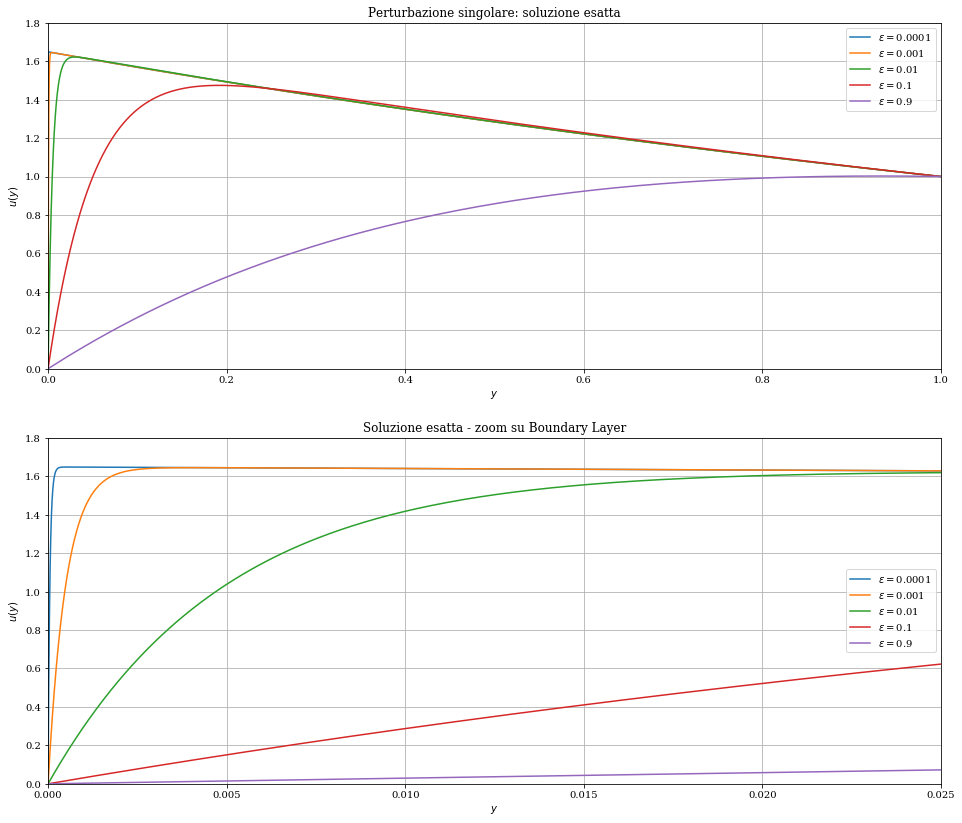

In [7]:
plt.figure(figsize=(16,14))
plt.subplot(211)
for ϵ in ϵ_v1:
    plt.plot(y,u(y,ϵ),label=r'$\epsilon=${0}'.format(ϵ))
plt.legend()
plt.xlim([0,1])
plt.ylim([0,1.8])
plt.xlabel(r'$y$')
plt.ylabel(r'$u(y)$')
plt.title(r'Perturbazione singolare: soluzione esatta')
plt.grid()
plt.subplot(212)
for ϵ in ϵ_v1:
    plt.plot(y,u(y,ϵ),label=r'$\epsilon=${0}'.format(ϵ))
plt.legend()
plt.xlim([0,.025])
plt.ylim([0,1.8])
plt.xlabel(r'$y$')
plt.ylabel(r'$u(y)$')
plt.title(r'Soluzione esatta - zoom su Boundary Layer')
plt.grid()


## Espansione

come nel caso precedente $u(y) = u_0(y) + u_1(y)\epsilon + u_2(y)\epsilon^2 + \ldots$

sostituendo:

$$\epsilon(u_{0/yy}+u_{1/yy}\epsilon+u_{2/yy}\epsilon^2+\ldots)+2(u_{0/y}+u_{1/y}\epsilon+u_{2/y}\epsilon^2+\ldots)+ u_{0}+u_{1}\epsilon+u_{2}\epsilon^2+\ldots = 0$$

Raccogliendo per $\epsilon$:

$$
\begin{eqnarray}
2u_{0/y} +u_0 &=& 0 \\
2u_{1/y} + u_1 &=& -u_{0/yy} \\
2u_{2/y} + u_2 &=& -u_{1/yy} \\
\end{eqnarray}
$$

In generale:

$$2u_{i/y}+u_i = -u_{i-1/yy}$$

Una serie di equazioni **advection-reaction** di primo grado

### Soluzione di ordine zero:

La soluzione della prima equazione:

$$u_0(y) = Ae^{-\frac{y}{2}}$$

Imporre la c.c. $u_0(0) = 0$ implica la soluzione nulla. Imporre invece la c.c. $u_0(1) = 1$ porta a:

$$u_0(y) = e^{\frac{1-y}{2}}$$

Che coincide con la soluzione originale ponendo $\epsilon = 0$

### Soluzione di ordine 1:

$$2u_{1/y} + u_1 = -\frac{1}{4}e^{-\frac{y}{2}}$$

Integrale generale:

$$u_{1g} = Ae^{\frac{1-y}{2}}$$

Integrale particolare (**Metodo di variazioni delle costanti**):

$$u_{1p}(y) = C(y)e^{-\frac{y}{2}}$$

Sostituendo:

$$2C'(y)e^{-\frac{y}{2}}-C(y)e^{-\frac{y}{2}}+C(y)e^{-\frac{y}{2}}=-\frac{1}{4}e^{\frac{1-y}{2}}$$

semplificando:

$$
\begin{eqnarray}
C'(y) &=& - \frac{1}{8} e^{\frac{1}{2}}\\
C(y) &=& - \frac{y}{8} e^{\frac{1}{2}}
\end{eqnarray}
$$

La soluzione diventa:

$$u_1(y) = Ae^{-\frac{y}{2}} - \frac{y}{8} e^{\frac{1-y}{2}} $$

La c.c. da applicare è omogenea: $u_1(1) = 0$

$$A = \frac{1}{8}e^{\frac{1}{2}}$$

E la soluzione:

$$u_1(y) = \frac{1-y}{8} e^{\frac{1-y}{2}}$$

La soluzione complessiva del **primo ordine** diventa:

$$u(y) = u_0(y) + \epsilon u_1(y)$$

In ogni caso la c.c. $u(0)=0$ non viene rispettata

In [8]:
def u0(y):
    u0 = np.exp((1-y)/2)
    return u0

def u1(y):
    u1 = (1-y)/8*u0(y)
    return u1

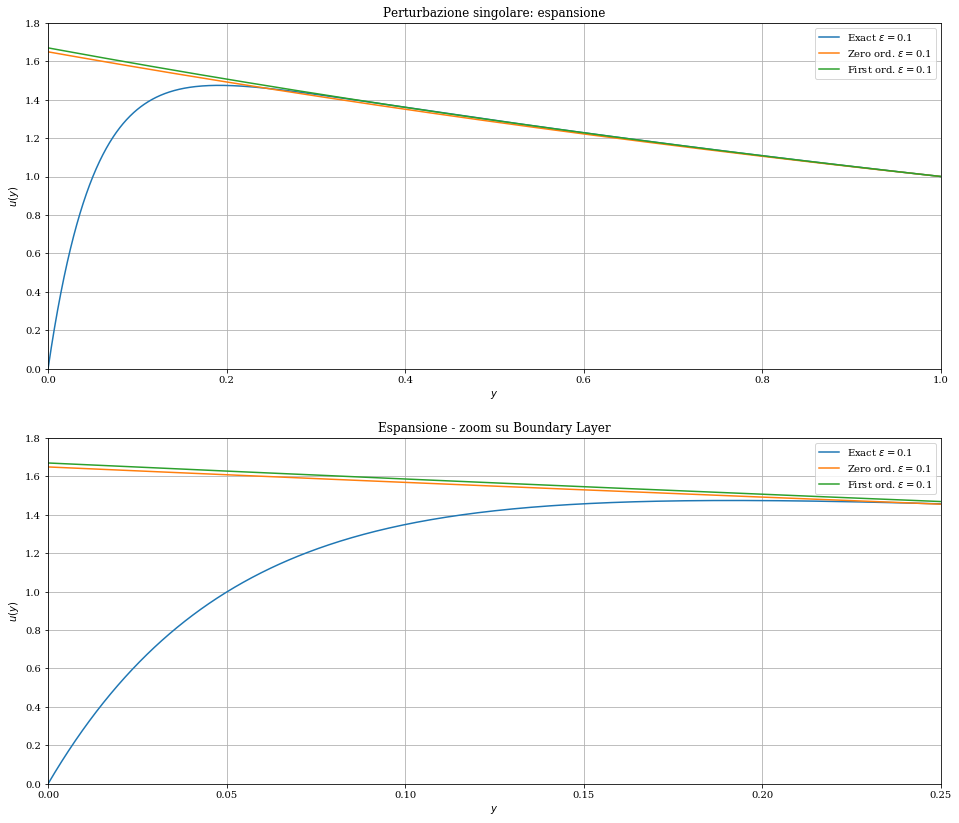

In [9]:
plt.figure(figsize=(16,14))
plt.subplot(211)
for ϵ in ϵ_v1[3:4]:
    plt.plot(y,u(y,ϵ),label=r'Exact $\epsilon=${0}'.format(ϵ))
    plt.plot(y,u0(y),label=r'Zero ord. $\epsilon=${0}'.format(ϵ))
    plt.plot(y,u0(y)+ϵ*u1(y),label=r'First ord. $\epsilon=${0}'.format(ϵ))
plt.legend()
plt.xlim([0,1])
plt.ylim([0,1.8])
plt.xlabel(r'$y$')
plt.ylabel(r'$u(y)$')
plt.title(r'Perturbazione singolare: espansione')
plt.grid()
plt.subplot(212)
for ϵ in ϵ_v1[3:4]:
    plt.plot(y,u(y,ϵ),label=r'Exact $\epsilon=${0}'.format(ϵ))
    plt.plot(y,u0(y),label=r'Zero ord. $\epsilon=${0}'.format(ϵ))
    plt.plot(y,u0(y)+ϵ*u1(y),label=r'First ord. $\epsilon=${0}'.format(ϵ))
plt.legend()
plt.xlim([0,.25])
plt.ylim([0,1.8])
plt.xlabel(r'$y$')
plt.ylabel(r'$u(y)$')
plt.title(r'Espansione - zoom su Boundary Layer')
plt.grid()

# Espansioni asintotiche raccordate

L'espansione sopra riportata approssima bene solamente la soluzione in una *regione esterna*, non potendo soddisfare la c.c. all'interno dello *strato limite*. A questo fine occorre infatti introdurre il problema interno con la relativa espansione.

## Scalatura della variabile

Coordinata *dilatata*:

$$Y = \frac{y}{\epsilon}$$

Nuova funzione incognita t.c.:

$$U(Y;\epsilon) = u(y;\epsilon)$$

ovvero:

$$U\left(\frac{y}{\epsilon};\epsilon\right) = u(y;\epsilon)$$

Si può così trasformare:

$$\frac{du(y;\epsilon)}{dy} = \frac{dU(Y;\epsilon)}{dy} = \frac{dU(Y;\epsilon)}{dY} \cdot \frac{dY}{dy} = \frac{1}{\epsilon}U_Y$$

Analogamente:

$$\frac{d^2u(y;\epsilon)}{dy^2} = \frac{1}{\epsilon^2}U_{YY}$$

Il problema originale diventa:

$$\frac{1}{\epsilon}U_{YY}+\frac{2}{\epsilon}U_{Y}+U = 0$$

ovvero:

$$U_{YY}+2U_{Y}+\epsilon U = 0$$

In questo caso è un'equazione lineare a coefficienti costanti, la cui soluzione è del tipo:

$$U(Y;\epsilon) = A_1e^{\lambda_1 y} + A_2e^{\lambda_2 y}$$

con:

$$\lambda_{1,2} = -1\pm\sqrt{1-\epsilon}$$

Con c.c. $U(0) = 0$ e $U\left(\frac{1}{\epsilon}\right) = 1$

$$U(Y;\epsilon) = \frac{e^{\lambda_1 Y} - e^{\lambda_2 Y}}{ e^{\frac{\lambda_1}{\epsilon}} - e^{\frac{\lambda_2}{\epsilon} } }$$

In [10]:
def U(Y,ϵ):
    γ1 = -1+np.sqrt(1-ϵ)
    γ2 = -1-np.sqrt(1-ϵ)
    #U = np.ones_like(Y)/(np.exp(γ1/ϵ)-np.exp(γ2/ϵ))
    U = (np.exp(γ1*Y)-np.exp(γ2*Y))/(np.exp(γ1/ϵ)-np.exp(γ2/ϵ))

    return U

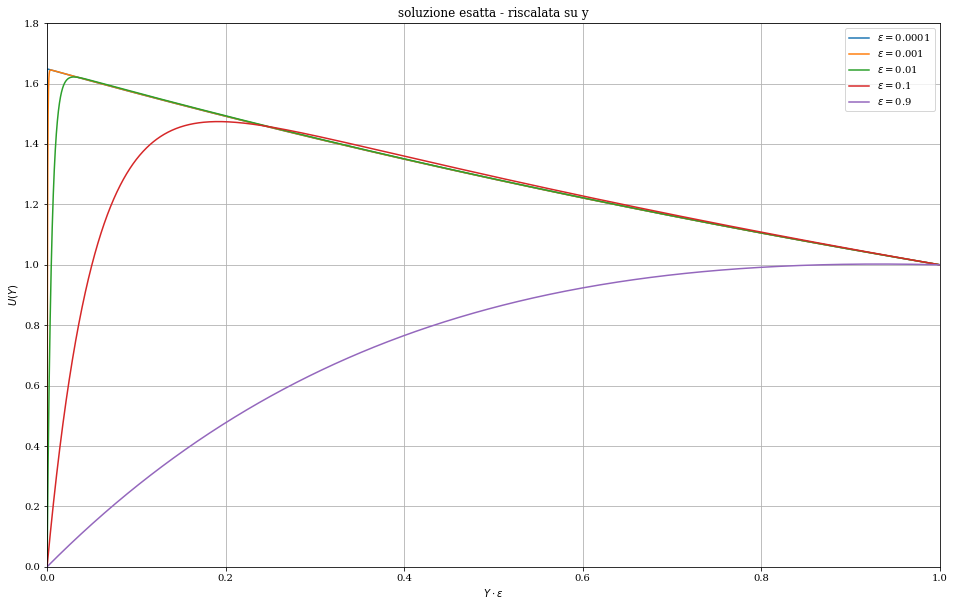

In [11]:
y = np.logspace(-10,0,num=5000)

plt.figure(figsize=(16,10))
for ϵ in ϵ_v1:
    Y = y/ϵ
    plt.plot(y,U(Y,ϵ),label=r'$\epsilon=${0}'.format(ϵ))
plt.legend()
plt.xlabel(r'$Y\cdot \epsilon$')
plt.ylabel(r'$U(Y)$')
plt.title('soluzione esatta - riscalata su y')
plt.xlim([0,1])
plt.ylim([0,1.8])
plt.grid()

## Espansione

come nei casi precedenti $U(Y) = U_0(Y) + U_1(Y)\epsilon + U_2(Y)\epsilon^2 + \ldots$

sostituendo:

$$U_{0/YY}+U_{1/YY}\epsilon+U_{2/YY}\epsilon^2+\ldots)+2(U_{0/Y}+U_{1/Y}\epsilon+U_{2/y}\epsilon^2+\ldots)+ U_{0}\epsilon+U_{1}\epsilon^2+U_{2}\epsilon^3+\ldots = 0$$

Raccogliendo per $\epsilon$:

$$
\begin{eqnarray}
U_{0/YY} +2U_{0/Y} &=& 0 \\
U_{1/YY} + 2U_{1/Y} &=& -U_0 \\
U_{2/YY} + 2U_{2/Y} &=& -U_1 \\
\end{eqnarray}
$$

In generale:

$$U_{i/YY}+2U_{i/Y} = -U_{i-1}$$

### Soluzione di ordine zero:

La soluzione della prima equazione:

$$U_0(Y) = Ce^{-2Y}+D$$

Si sono 2 cc. da imporre: $U_0(0) = 0$ implica $D=-C$. Imporre invece la c.c. $U_0\left(\frac{1}{\epsilon}\right) = 1$ non ha senso, perchè appartiene alla regione esterna. Per il momento si lascia la costante C.

Imporre entrambe le c.c. darebbe

$$U_0(Y) = \frac{e^{2Y}-1}{e^{-\frac{2}{\epsilon}}-1}$$ 

(Analizzare il grafico)

In [12]:
def U0_2c(Y,ϵ):
    return (np.exp(-2*Y)-1)/(np.exp(-2/ϵ)-1)

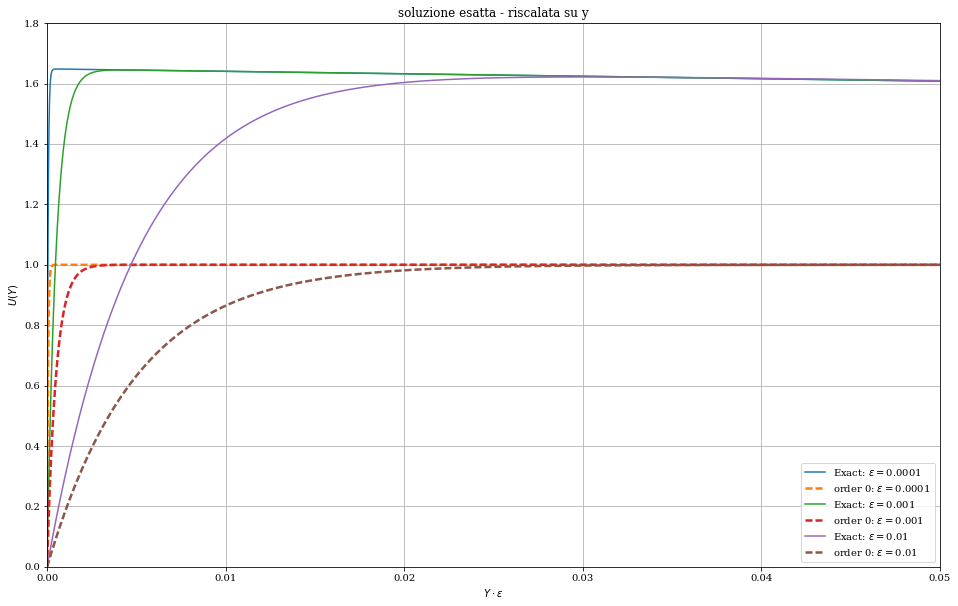

In [13]:
y = np.logspace(-10,0,num=1000)

plt.figure(figsize=(16,10))
for ϵ in ϵ_v1[:-2]:
    Y = y/ϵ
    plt.plot(y,U(Y,ϵ),label=r'Exact: $\epsilon=${0}'.format(ϵ))
    #f = U0_2c(Y,ϵ)
    #print(f)
    plt.plot(y,U0_2c(Y,ϵ),'--',lw=2.5,label=r'order 0: $\epsilon=${0}'.format(ϵ))
plt.legend()
plt.xlabel(r'$Y\cdot \epsilon$')
plt.ylabel(r'$U(Y)$')
plt.title('soluzione esatta - riscalata su y')
plt.xlim([0,0.05])
plt.ylim([0,1.8])
plt.grid()

### Soluzione di ordine 1:

$$U_{1/YY} + 2U_{1/Y} = -C\left(e^{-2Y}-1\right)$$

Integrando una volta:

$$U_{1/Y} +2U_1 = \frac{C}{2}e^{-2Y} +CY +D$$

Integrale generale:

$$U_{1g} = Ee^{-2Y}$$

Integrale particolare (**Metodo di variazioni delle costanti**):

$$U_{1p}(Y) = F(Y)e^{-2Y}$$

Sostituendo:

$$2F'(Y)e^{-2Y}-2F(Y)e^{-2Y}+2F(Y)e^{-2Y}=C \left(\frac{e^{-2Y}}{2}+Y\right)+D$$

semplificando:

$$
\begin{eqnarray}
F'(Y) &=& \frac{C}{2} + Ce^{2Y}Y+De^{2Y}\\
F(Y) &=& \frac{C}{2}Y + \frac{C}{2}e^{2Y}\left(Y-\frac{1}{2}\right)+\frac{D}{2}e^{2Y} + K
\end{eqnarray}
$$

La soluzione diventa:

$$U_1(Y) = Ee^{-2Y} + \frac{C}{2}Ye^{-2Y} + \frac{C}{2}\left(Y-\frac{1}{2}\right)+\frac{D}{2}$$

La c.c. da applicare è omogenea: $U_1(0) = 0$

$$E = \frac{C}{4}-\frac{D}{2}$$

E la soluzione:

$$U_1(Y) = \frac{C}{2}\left(\frac{e^{-2Y}}{2} + Ye^{-2Y} + Y-\frac{1}{2}\right)+\frac{D}{2}\left(1-e^{-2Y}\right)$$

La soluzione complessiva del **primo ordine** diventa:

$$U(Y) = U_0(Y) + \epsilon U_1(Y)$$

funzione delle costanti **C** e **D** da imporre in una regione intermedia, in cui *y* sia *piccolo* e *Y* sia *grande*

### Condizione di raccordo

Si deve imporre che le due soluzioni si raccordino con continuità in una regione intermedia. (**teorema di Kaplun**).
Si definisce una coordinata dilatata intermedia:

$$\mathscr{y}_b = \frac{y}{\epsilon^b} \quad 0 < b < 1$$

La condizione di raccordo all’interfaccia consiste allora nell’imporre che, per $\epsilon \rightarrow 0$, la differenza fra la soluzione esterna e la soluzione interna si annulli nella zona intermedia. Quindi per $\mathscr{y}_b$ fissato, la differenza deve $\rightarrow 0$ come $\epsilon^i \ \forall i$ inclusi nell'espansione. Ovvero:

$$\lim_{\epsilon \rightarrow 0 \ \mathscr{y}_b = const.} \frac{U(Y;\epsilon) - u(y;\epsilon)}{\epsilon^i}=\frac{U(\mathscr{y}_b \epsilon^{b-1}) - u(\mathscr{y}_b \epsilon^b)}{\epsilon^i}=0$$

Sostituendo le espansioni:

$$\lim_{\epsilon \rightarrow 0} = \frac{\left[U_0(Y)+\epsilon U_1(Y)+\ldots \right]-\left[u_0(y)+\epsilon u_1(y)+\ldots \right]}{\epsilon^i}$$

è necessario che:
- la variabile indipendente sia la stessa
- $\epsilon$ compaia esplicitamente

Si espande la soluzione esterna per $\mathscr{y}_b=cost$ e per $\epsilon \rightarrow 0$:

$$u_0(y) + \epsilon u_1(y) + \ldots = u_0(0) + \frac{du_0(0)}{dy}y + \frac{1}{2}\frac{du_0^2(0)}{dy^2}y^2+\ldots + \epsilon \left( u_1(0) + \frac{du_1(0)}{dy}y + \frac{1}{2}\frac{du_1^2(0)}{dy^2}y^2+\ldots   \right)$$

si introduce il cambio di variabili $y = \epsilon Y$:

$$u_0(y) + \epsilon u_1(y) + \ldots = u_0(0) + \epsilon \frac{du_0(0)}{dy}Y + \frac{\epsilon^2}{2}\frac{du_0^2(0)}{dy^2}Y^2+\ldots + \epsilon \left( u_1(0) + \epsilon \frac{du_1(0)}{dy}Y + \frac{\epsilon^2}{2}\frac{du_1^2(0)}{dy^2}y^2+\ldots   \right)$$

raccogliendo per potenze di $\epsilon$:

$$u_0(y) + \epsilon u_1(y) + \ldots = u_0(0) +  \epsilon \left(\frac{du_0(0)}{dy}Y+u_1(0) \right) + \epsilon^2 \left(\frac{1}{2}\frac{du_0^2(0)}{dy^2}Y^2  + \frac{du_1(0)}{dy}Y\right) +\ldots   $$


Troncando per semplicità al primo ordine e sostituendo nel limite:

$$\lim_{\epsilon \to 0} = \frac{\left[U_0(Y)+\epsilon U_1(Y) \right]-\left[u_0(0) +  \epsilon \left(\frac{du_0(0)}{dy}Y+u_1(0) \right) \right]}{\epsilon^i}=0 \quad i=0,1,\ldots$$

Per $i=0$:

$$\lim_{Y\to \infty}U_0(Y)-u_0(0)=0$$

Per $i=1$:

$$\lim_{Y \to \infty} = U_1(Y)-\left(\frac{du_0(0)}{dy}Y+u_1(0) \right)=0$$

E di seguito per $i\geq2 \ldots$

## Raccordo di ordine 0:

$$
\begin{eqnarray}
U_0(Y) &=& C \left(e^{-2Y}-1\right) \\
u_0(y) &=& e^{\frac{1-y}{2}}
\end{eqnarray}
$$

Da cui

$$C=-e^{\frac{1}{2}}$$


In [14]:
def U0_racc0(Y):
    return np.exp(0.5)*(1-np.exp(-2*Y))

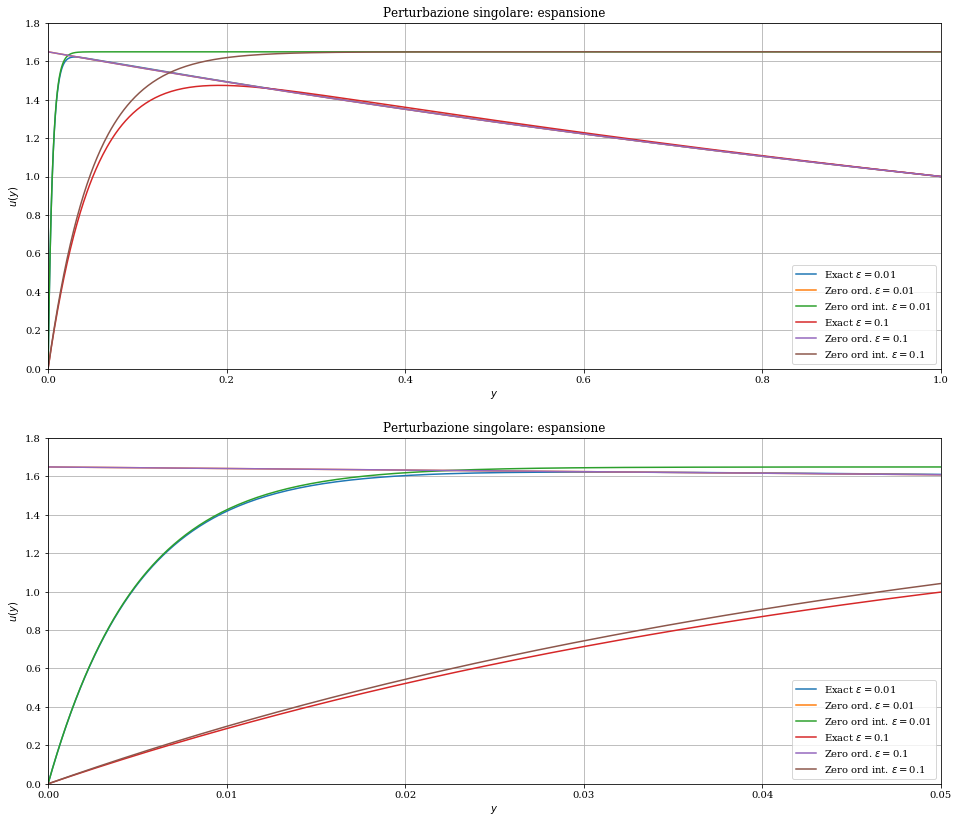

In [15]:
y = np.logspace(-10,0,num=1000)

plt.figure(figsize=(16,14))
plt.subplot(211)
for ϵ in ϵ_v1[2:4]:
    Y = y/ϵ
    plt.plot(y,u(y,ϵ),label=r'Exact $\epsilon=${0}'.format(ϵ))
    plt.plot(y,u0(y),label=r'Zero ord. $\epsilon=${0}'.format(ϵ))
    plt.plot(y,U0_racc0(Y),label=r'Zero ord int. $\epsilon=${0}'.format(ϵ))
plt.legend()
plt.xlim([0,1])
plt.ylim([0,1.8])
plt.xlabel(r'$y$')
plt.ylabel(r'$u(y)$')
plt.title(r'Perturbazione singolare: espansione')
plt.grid()
plt.subplot(212)
for ϵ in ϵ_v1[2:4]:
    Y = y/ϵ
    plt.plot(y,u(y,ϵ),label=r'Exact $\epsilon=${0}'.format(ϵ))
    plt.plot(y,u0(y),label=r'Zero ord. $\epsilon=${0}'.format(ϵ))
    plt.plot(y,U0_racc0(Y),label=r'Zero ord int. $\epsilon=${0}'.format(ϵ))
plt.legend()
plt.xlim([0,0.05])
plt.ylim([0,1.8])
plt.xlabel(r'$y$')
plt.ylabel(r'$u(y)$')
plt.title(r'Perturbazione singolare: espansione')
plt.grid()

## Raccordo di Ordine 1


$$
\begin{eqnarray}
U_1(Y) &=& -\frac{e^{\frac{1}{2}}}{2} \left( \frac{e^{-2Y}}{2}+Ye^{-2Y}+Y-\frac{1}{2} \right) + \frac{D}{2}\left(1-e^{-2Y}  \right) \\
u_0(y) &=& e^{\frac{1-y}{2}} \\
u_1(y) &=& \frac{1-y}{8}e^{\frac{1-y}{2}}
\end{eqnarray}
$$

Deve essere:

$$\lim_{Y \to \infty} = U_1(Y)-\left(\frac{du_0(0)}{dy}Y+u_1(0) \right)=0$$

Eliminando i termini che $\rightarrow 0$ se $Y\rightarrow \infty$

$$-\frac{e^{\frac{1}{2}}}{2} \left( +Y-\frac{1}{2} \right) + \frac{D}{2}+\frac{e^{\frac{1}{2}}}{2}Y-\frac{e^{\frac{1}{2}}}{8}=0$$

si ottiene

$$\frac{D}{2} = -\frac{e^{\frac{1}{2}}}{8}$$

Sostituendo:

$$U_1(Y) = \frac{e^{\frac{1}{2}}}{8}\left(1 -4Y -e^{-2Y}\left(1+4Y\right)  \right)$$

In [16]:
def U1_racc1(Y):
    return np.exp(0.5)/8*(1-4*Y-np.exp(-2*Y)*(1+4*Y))

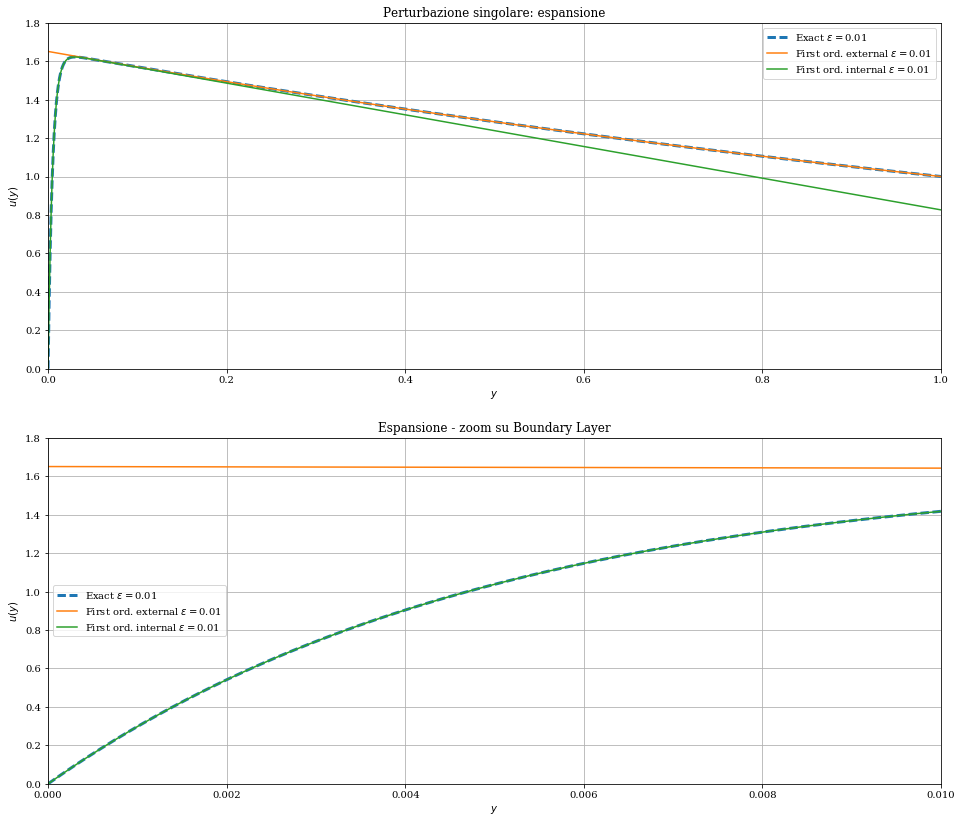

In [24]:
y = np.logspace(-10,0,num=1000)


plt.figure(figsize=(16,14))
plt.subplot(211)
for ϵ in ϵ_v1[2:3]:
    Y = y/ϵ
    plt.plot(y,u(y,ϵ),'--',lw=3,label=r'Exact $\epsilon=${0}'.format(ϵ))
    plt.plot(y,u0(y)+ϵ*u1(y),label=r'First ord. external $\epsilon=${0}'.format(ϵ))
    plt.plot(y,U0_racc0(Y)+ϵ*U1_racc1(Y),label=r'First ord. internal $\epsilon=${0}'.format(ϵ))
plt.legend()
plt.xlim([0,1])
plt.ylim([0,1.8])
plt.xlabel(r'$y$')
plt.ylabel(r'$u(y)$')
plt.title(r'Perturbazione singolare: espansione')
plt.grid()
plt.subplot(212)
for ϵ in ϵ_v1[2:3]:
    Y = y/ϵ
    plt.plot(y,u(y,ϵ),'--',lw=3,label=r'Exact $\epsilon=${0}'.format(ϵ))
    plt.plot(y,u0(y)+ϵ*u1(y),label=r'First ord. external $\epsilon=${0}'.format(ϵ))
    plt.plot(y,U0_racc0(Y)+ϵ*U1_racc1(Y),label=r'First ord. internal $\epsilon=${0}'.format(ϵ))
plt.legend()
plt.xlim([0,.01])
plt.ylim([0,1.8])
plt.xlabel(r'$y$')
plt.ylabel(r'$u(y)$')
plt.title(r'Espansione - zoom su Boundary Layer')
plt.grid()

## Soluzione composita

La soluzione _interna_, *U*, e la soluzione _esterna_ *u* approssimano la soluzione esatta. Sommando le soluzioni e sottraendo la parte comune si ottiene la **soluzione composita**:

### Ordine zero

$$
\begin{eqnarray}
u_0(y) &=& e^{\frac{1-y}{2}}\\
U_0(Y) &=& e^{\frac{1}{2}}\left(1-e^{-2Y}\right)\\
u^c_0(y) &=& u_0(y)+U_0\left(\frac{y}{\epsilon}\right) - u^{comm}_0(y) \\
u^c_0(y) &=& e^{\frac{1-y}{2}}+e^{\frac{1}{2}}\left(1-e^{-2\frac{y}{\epsilon}}\right) - e^{\frac{1}{2}} \\
\end{eqnarray}
$$

In [31]:
def u0_c(y,ϵ):
    return np.exp(0.5)*(np.exp(-y/2) - np.exp(-2*y/ϵ))

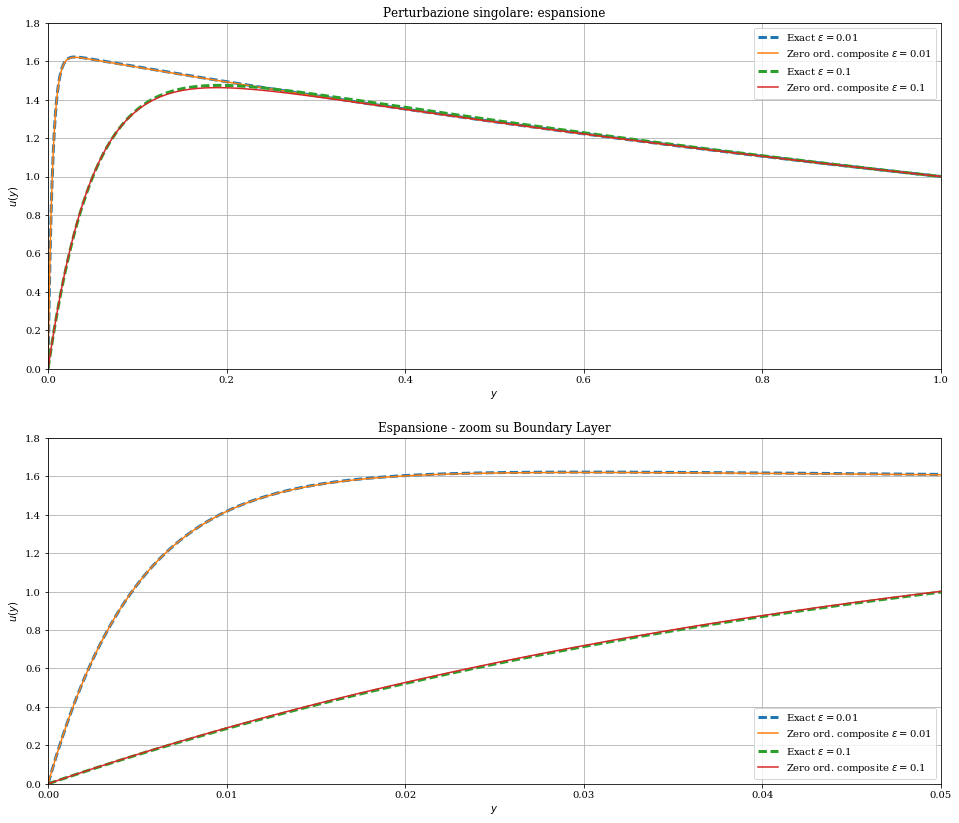

In [36]:
y = np.logspace(-10,0,num=1000)


plt.figure(figsize=(16,14))
plt.subplot(211)
for ϵ in ϵ_v1[2:4]:
    plt.plot(y,u(y,ϵ),'--',lw=3,label=r'Exact $\epsilon=${0}'.format(ϵ))
    plt.plot(y,u0_c(y,ϵ),label=r'Zero ord. composite $\epsilon=${0}'.format(ϵ))
plt.legend()
plt.xlim([0,1])
plt.ylim([0,1.8])
plt.xlabel(r'$y$')
plt.ylabel(r'$u(y)$')
plt.title(r'Perturbazione singolare: espansione')
plt.grid()
plt.subplot(212)
for ϵ in ϵ_v1[2:4]:
    plt.plot(y,u(y,ϵ),'--',lw=3,label=r'Exact $\epsilon=${0}'.format(ϵ))
    plt.plot(y,u0_c(y,ϵ),label=r'Zero ord. composite $\epsilon=${0}'.format(ϵ))
plt.legend()
plt.xlim([0,.05])
plt.ylim([0,1.8])
plt.xlabel(r'$y$')
plt.ylabel(r'$u(y)$')
plt.title(r'Espansione - zoom su Boundary Layer')
plt.grid()

### Ordine uno

La condizione da aggiungere alla soluzione di *ordine zero* è la condizione di raccordo:

$$\lim_{Y \to \infty} U_1(Y) = \lim_{Y \to \infty} \left[u_1(0) + \frac{du_0(0)}{dy} Y  \right]$$

Si ottiene

$$
\begin{eqnarray}
u^c_1(y) &=& u^c_0(y) + \epsilon \left[ u_1(y) +U_1\left(\frac{y}{\epsilon}\right) - u_1(0) -\frac{du_1(0)}{dy}Y    \right]\\
u^c_1(y) &=& e^{\frac{1}{2}}\left(e^{\frac{-y}{2}} -e^{\frac{-2y}{\epsilon}} \right) + \frac{e^{\frac{1}{2}}}{8} \left[\epsilon(1-y)e^{-\frac{y}{2}} -(\epsilon+4y)e^{\frac{-2y}{\epsilon}}  \right]
\end{eqnarray}
$$

 

In [37]:
def u1_c(y,ϵ):
    return u0_c(y,ϵ)+np.exp(0.5)/8*(ϵ*(1-y)*np.exp(-y/2)-(ϵ+4*y)*np.exp(-2*y/ϵ) )

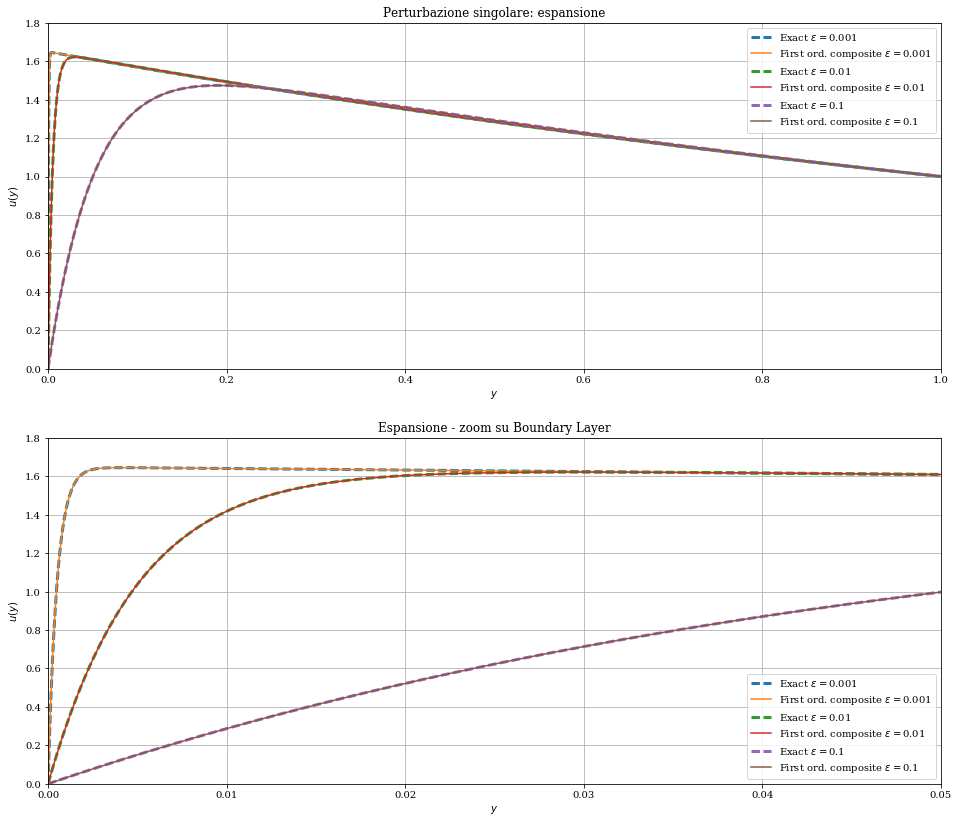

In [39]:
y = np.logspace(-10,0,num=1000)


plt.figure(figsize=(16,14))
plt.subplot(211)
for ϵ in ϵ_v1[1:4]:
    plt.plot(y,u(y,ϵ),'--',lw=3,label=r'Exact $\epsilon=${0}'.format(ϵ))
    plt.plot(y,u1_c(y,ϵ),label=r'First ord. composite $\epsilon=${0}'.format(ϵ))
plt.legend()
plt.xlim([0,1])
plt.ylim([0,1.8])
plt.xlabel(r'$y$')
plt.ylabel(r'$u(y)$')
plt.title(r'Perturbazione singolare: espansione')
plt.grid()
plt.subplot(212)
for ϵ in ϵ_v1[1:4]:
    plt.plot(y,u(y,ϵ),'--',lw=3,label=r'Exact $\epsilon=${0}'.format(ϵ))
    plt.plot(y,u1_c(y,ϵ),label=r'First ord. composite $\epsilon=${0}'.format(ϵ))
plt.legend()
plt.xlim([0,.05])
plt.ylim([0,1.8])
plt.xlabel(r'$y$')
plt.ylabel(r'$u(y)$')
plt.title(r'Espansione - zoom su Boundary Layer')
plt.grid()